<a href="https://colab.research.google.com/github/William-Kent/Weeds_Object_Detection_Model/blob/main/InTheWeeds_FasterRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gardener's Friend: Faster RCNN
## Dataset
The original dataset can be found [here](https://weed-ai.sydney.edu.au/datasets/2c14915b-0827-4b65-9908-d2a6df0d48f3). The dataset is named CottonWeedDet12 and comprises 5,648 colour images of weeds that are common to cotton fields in the southern US. For this project the dataset was modified with images were resized to be 1280 x 720 and annotations updated to match the resized images. The updated dataset used in this project can be found [here](https://app.roboflow.com/deep-learning-assignment-ewyc5/weed-detection-d7dau/5). The dataset is licenced under CC BY 4.0.

## Code
This notebook builds on the lab from Week 8. It's based on code in the repo provided by Gitarth Vaishnav [here](https://github.com/GitarthVaishnav/FasterRCNN42028).

In [1]:
# Clone Github repo provided by Gitarth
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 51), reused 108 (delta 37), pack-reused 0
Receiving objects: 100% (124/124), 4.28 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
# Change to repo directory.
%cd FasterRCNN42028/

/content/FasterRCNN42028


In [3]:
# Install requirements from requirements.txt
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

In [6]:
# Change directory to data location
%cd /content/FasterRCNN42028/data

/content/FasterRCNN42028/data


In [7]:
# Get modified dataset from Roboflow
!curl -L https://app.roboflow.com/ds/g1rGy26J5l?key=VmF1TQyotP > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/20210805_iPhoneSE_YL_113_jpg.rf.addd625018106deff592095996c42b62.xml  
 extracting: train/20210805_iPhoneSE_YL_115_jpg.rf.9f6a9162a59118459207aca9410c610a.jpg  
 extracting: train/20210805_iPhoneSE_YL_115_jpg.rf.9f6a9162a59118459207aca9410c610a.xml  
 extracting: train/20210805_iPhoneSE_YL_117_jpg.rf.b2fdcf31d7072bbc21bc3fe7a76f4d17.jpg  
 extracting: train/20210805_iPhoneSE_YL_117_jpg.rf.b2fdcf31d7072bbc21bc3fe7a76f4d17.xml  
 extracting: train/20210805_iPhoneSE_YL_118_jpg.rf.949a2b46384deedc1e4e3ff53b467fa9.jpg  
 extracting: train/20210805_iPhoneSE_YL_118_jpg.rf.949a2b46384deedc1e4e3ff53b467fa9.xml  
 extracting: train/20210805_iPhoneSE_YL_120_jpg.rf.11ee80f679262529daa8daec4355dbce.jpg  
 extracting: train/20210805_iPhoneSE_YL_120_jpg.rf.11ee80f679262529daa8daec4355dbce.xml  
 extracting: train/20210805_iPhoneSE_YL_121_jpg.rf.2b4157e8852be48fbc8564a5e829a004.jpg  
 extracting: train/20210805_iPhoneSE_YL_121_jpg.r

In [8]:
# Change directory
%cd /content/FasterRCNN42028

/content/FasterRCNN42028


In [9]:
# Create customer_data.yaml with required parameters
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
# WRITE YOUR PATH HERE:
TRAIN_DIR_IMAGES: '/content/FasterRCNN42028/data/train'
TRAIN_DIR_LABELS: '/content/FasterRCNN42028/data/train'
VALID_DIR_IMAGES: '/content/FasterRCNN42028/data/valid'
VALID_DIR_LABELS: '/content/FasterRCNN42028/data/valid'

# Class names.
# WRITE YOUR CLASSES HERE - DO NOT REMOVE __background__ CLASS:
CLASSES: [
    '__background__',
    'amaranthus palmeri',
    'amaranthus tuberculatus',
    'ambrosia artemisiifolia',
    'eclipta',
    'eleusine indica',
    'euphorbia maculata',
    'ipomoea indica',
    'mollugo verticillata',
    'physalis angulata',
    'portulaca oleracea',
    'senna obtusifolia',
    'sida rhombifolia'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
# WRITE NUMBER OF CLASSES:
NC: 13

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [10]:
!wandb disabled

W&B disabled.


In [11]:
# Check contents of directory
!ls

_config.yml   eval.py		  __init__.py	     README.md	       utils
data	      example_test_data   models	     requirements.txt  wandb
data_configs  inference.py	  notebook_examples  torch_utils
datasets.py   inference_video.py  readme_images      train.py


In [13]:
# Run the process to train the faster RCNN model
!python train.py --config data_configs/custom_data.yaml --epochs 30 --model fasterrcnn_resnet50_fpn_v2 --project-name training --batch-size 6 --no-mosaic

Not using distributed mode
device cuda
2023-04-30 03:44:09.906000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 03:44:10.879358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 

In [14]:
import matplotlib.pyplot as plt
import glob as glob

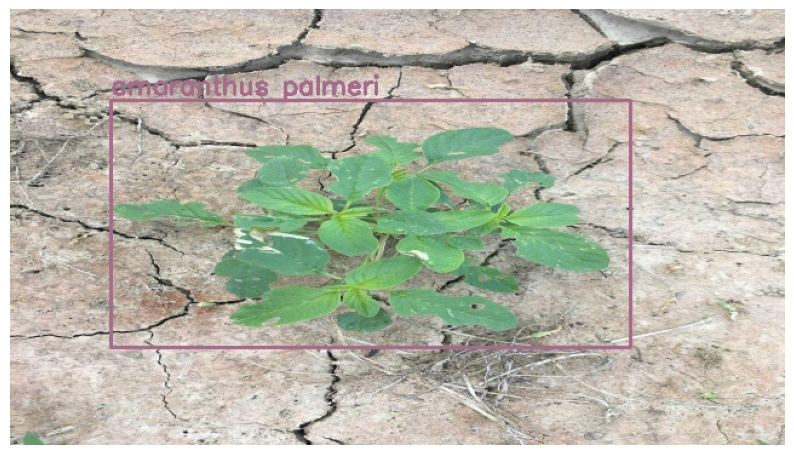

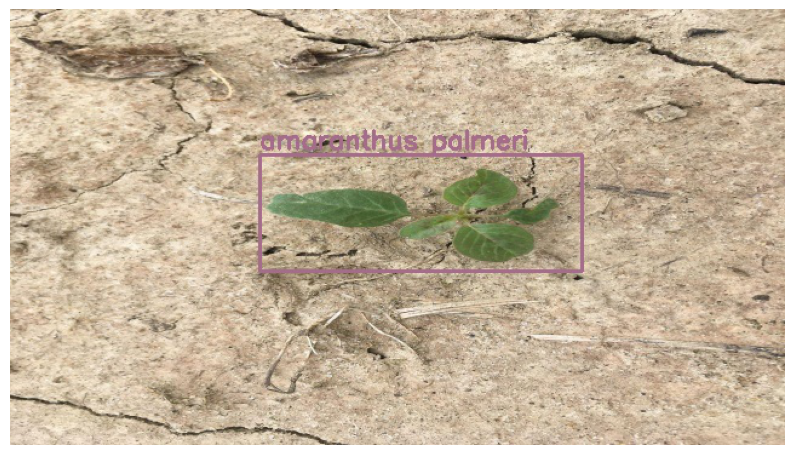

In [15]:
# Show results on validation data
results_dir_path = "/content/FasterRCNN42028/outputs/training/training"
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [16]:
# Evaluate model on test images
!python eval.py --weights outputs/training/training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 88/88 [02:00<00:00,  1.37s/it]


{'map': tensor(0.5325),
 'map_50': tensor(0.7866),
 'map_75': tensor(0.6292),
 'map_large': tensor(0.5780),
 'map_medium': tensor(0.1710),
 'map_per_class': tensor([0.6384, 0.5701, 0.5088, 0.4449, 0.6738, 0.4386, 0.5545, 0.5623, 0.3616,
        0.4330, 0.6069, 0.5969]),
 'map_small': tensor(0.0833),
 'mar_1': tensor(0.5492),
 'mar_10': tensor(0.6276),
 'mar_100': tensor(0.6283),
 'mar_100_per_class': tensor([0.7059, 0.6943, 0.6016, 0.5696, 0.6900, 0.5790, 0.6333, 0.6145, 0.4714,
   

In [17]:
# Show output on sample images
!python inference.py --input FasterRCNN42028/data/train/20210628_iPhoneSE_YL_101_jpg.rf.713e4ca62ed7996f4426df173be8d4c0.jpg --weights outputs/training/training/best_model.pth

Building from model name arguments...
Test instances: 1
[ WARN:0@11.247] global loadsave.cpp:244 findDecoder imread_('FasterRCNN42028/data/train/20210628_iPhoneSE_YL_101_jpg.rf.713e4ca62ed7996f4426df173be8d4c0.jpg'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  File "/content/FasterRCNN42028/inference.py", line 211, in <module>
    main(args)
  File "/content/FasterRCNN42028/inference.py", line 155, in main
    frame_height, frame_width, _ = orig_image.shape
AttributeError: 'NoneType' object has no attribute 'shape'


In [ ]:
# Chnage path to output image
image = plt.imread('outputs/inference/res_1/12.jpg')
/content/FasterRCNN42028/data/train/
plt.imshow(image)
plt.axis('off')
plt.show()